# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *9장 합성곱 신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### LAB 9-1 합성곱을 구현해 보자

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
from tensorflow import keras

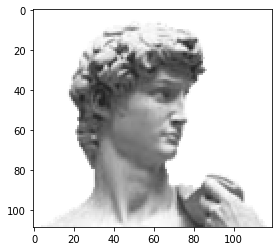

In [37]:
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

plt.imshow(img)  # 아래는 david.png 뿐 아니라 book.png도 로드한 결과임

In [38]:
img.shape

(109, 120, 4)

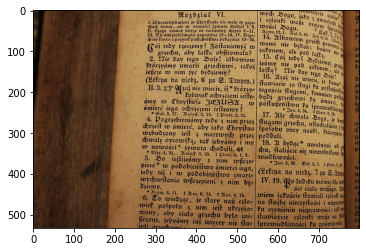

In [39]:
# 책에는 아래 URL이 없으나 그림은 나타나 있음
url = 'https://github.com/dknife/ML/raw/main/data/image/book.png'
img = mpimg.imread(url)

plt.imshow(img)  # 아래는 david.png 뿐 아니라 book.png도 로드한 결과임

In [40]:
# 다비드 그림을 사용하자
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

def padding(image, p_size):    # 넘파이의 pad 함수를 이용한 패딩 구현
    padded_img = np.pad(
                   array = image,
                   pad_width = ((p_size,p_size), (p_size,p_size), (0,0)),
                   mode = 'constant', constant_values = 0)
    return padded_img

(113, 124, 4)

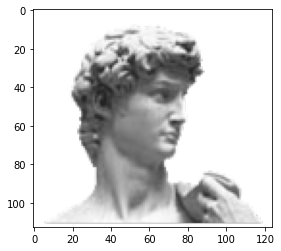

In [41]:
padded = padding(img, 2)
plt.imshow(padded)
padded.shape

In [42]:
box_filter = np.array(
   [[1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]])

In [43]:
def apply_filter(small_region, filter) :
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

In [44]:
def convolution(img, filter):
   r, c, channels = img.shape
   rp, cp = filter.shape
   th_r, th_c = (rp-1)//2 , (cp-1)//2
  
   start = np.array([ th_r, th_c ])
   end = np.array([r, c]) - start
   print(start, end, rp, cp)
   conv_img = np.zeros( (r - th_r*2, c - th_c*2, channels) )

   for channel in range(channels):
       for i in range(start[0], end[0]):
           for j in range(start[1], end[1]):
               conv_img[i-th_r, j-th_c, channel] = apply_filter(
                       img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel], 
                       filter)
   return conv_img

[1 1] [112 123] 3 3


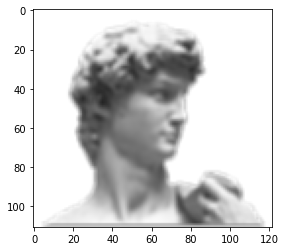

In [45]:
conv_img = convolution(padded, box_filter)
plt.imshow(conv_img)

[1 1] [112 123] 3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


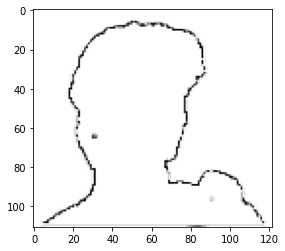

In [46]:
laplacian = np.array(
   [[1, 0, 1],
    [0, -4, 0],
    [1, 0, 1],    ])
conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

[1 1] [112 123] 3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


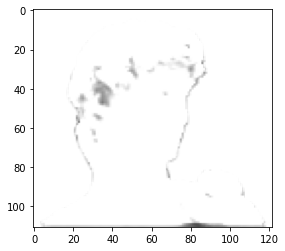

In [47]:
unknown = np.random.rand(3, 3)

conv_img = convolution(padded, unknown)
np.clip(conv_img, 0, 255)
plt.imshow(conv_img)

### 9-7 합성곱 신경망 모델의 구성

In [48]:
# 부분코드로 실행되지 않음 - 참고용 코드
'''
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (64, 64, 3), 
                        kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding='same' filters = 64),
    … ])
'''

"\nmodel = keras.models.Sequential( [\n    keras.layers.Conv2D(input_shape = (64, 64, 3), \n                        kernel_size = (3,3), filters = 32),\n    keras.layers.MaxPooling2D((2, 2), strides=2),\n    keras.layers.Conv2D(kernel_size = (3,3), padding='same' filters = 64),\n    … ])\n"

### LAB 9-2 : 합성곱 신경망으로 패션 MNIST 분류를 개선하기

In [49]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [50]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [51]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [52]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', #convolution과 pooling은 한 세트
                        filters = 32),
     keras.layers.MaxPooling2D((2, 2), strides=2),
     keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

In [54]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, 
                    epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 18s 12ms/step - loss: 0.8411 - accuracy: 0.7603 - val_loss: 0.4421 - val_accuracy: 0.8442
Epoch 2/5
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3594 - accuracy: 0.8715 - val_loss: 0.3456 - val_accuracy: 0.8751
Epoch 3/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3149 - accuracy: 0.8863 - val_loss: 0.3559 - val_accuracy: 0.8783
Epoch 4/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2918 - accuracy: 0.8941 - val_loss: 0.3427 - val_accuracy: 0.8808
Epoch 5/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2787 - accuracy: 0.8998 - val_loss: 0.3112 - val_accuracy: 0.8892


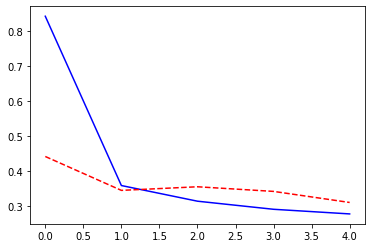

In [55]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

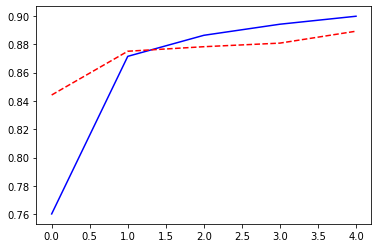

In [56]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3318 - accuracy: 0.8839 - 1s/epoch - 3ms/step
테스트 정확도: 0.883899986743927


In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [59]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)

[0 4 5 6 0 4 5 2 1 0 1 1 6 2 3 8 2 6 6 7 0 4 0 8 5]


In [60]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                        figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images: break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(28,28)
         if n_rows>1: axis = ax[i, j]
         else: axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = class_names[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, cmap='gray', interpolation='nearest')

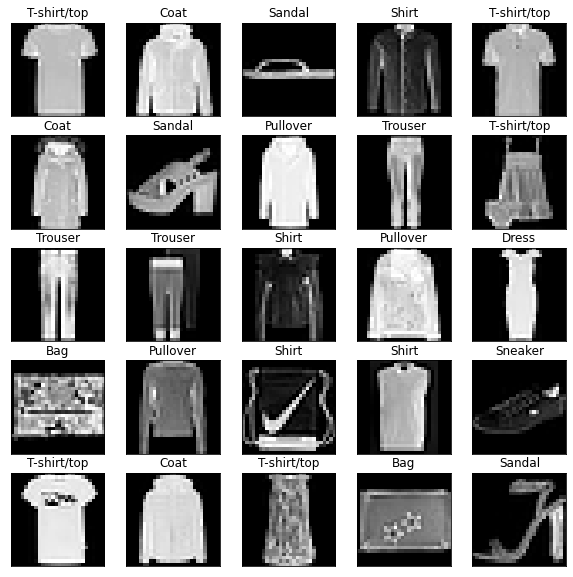

In [61]:
plot_images(images, predictions, images_per_row = 5)

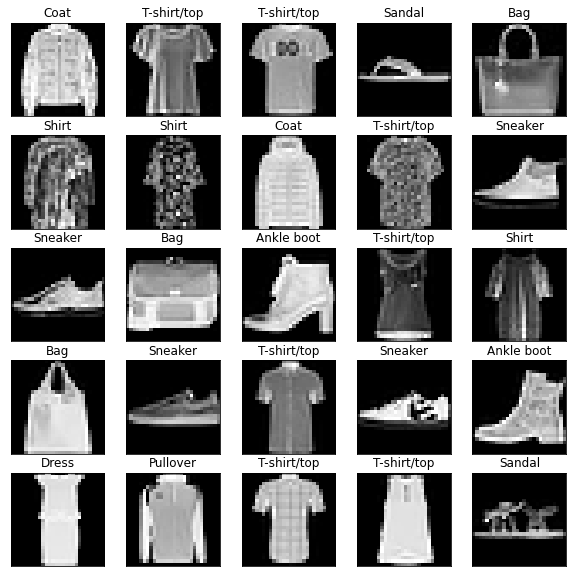

In [62]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row = 5)

### LAB 9-3: 고급 CNN을 가져다 써보자.

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import models, layers 
from tensorflow.keras.models import Model, load_model 
import pandas as pd
from tensorflow.keras.optimizers import RMSprop

In [64]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 훈련데이터는 10000개, 검증 데이터는 2000개만 사용
x_train, x_test = x_train[:10000] / 255.0, x_test[:2000] / 255.0
y_train, y_test = y_train[:10000], y_test[:2000]

In [65]:
x_train_preprocess = np.zeros((x_train.shape[0], 75, 75, 3), 
                              dtype=np.float32)
print(x_train_preprocess.shape)
# 훈련 데이터 각각의 크기를 75x75로 변형 (인셉션 모델의 최소 크기)
for i, img in enumerate(x_train):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_train_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

(10000, 75, 75, 3)


In [66]:
x_test_preprocess = np.zeros((x_test.shape[0], 75, 75, 3), 
                             dtype=np.float32)
print(x_test_preprocess.shape)
# 검증 데이터 각각의 크기를 75x75로 변형 (인셉션모델 최소 입력 크기)
for i, img in enumerate(x_test):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_test_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

(2000, 75, 75, 3)


In [67]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                              include_top=False,
                              weights=None)
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_100 (Conv2D)            (None, 37, 37, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 37, 37, 32)  96          ['conv2d_100[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 37, 37, 32)   0           ['batch_normalization_

In [68]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(10, activation='sigmoid')(x)

In [69]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [70]:
history = model.fit(x_train_preprocess, y_train, epochs=20, 
                    validation_data=(x_test_preprocess, y_test))

Epoch 1/20
313/313 [==============================] - 56s 144ms/step - loss: 1.3937 - accuracy: 0.7461 - val_loss: 5.2222 - val_accuracy: 0.4585
Epoch 2/20
313/313 [==============================] - 43s 137ms/step - loss: 0.2902 - accuracy: 0.9402 - val_loss: 2.9938 - val_accuracy: 0.7150
Epoch 3/20
313/313 [==============================] - 43s 138ms/step - loss: 0.2035 - accuracy: 0.9583 - val_loss: 34.8068 - val_accuracy: 0.4885
Epoch 4/20
313/313 [==============================] - 43s 137ms/step - loss: 0.1830 - accuracy: 0.9650 - val_loss: 4.1707 - val_accuracy: 0.8905
Epoch 5/20
313/313 [==============================] - 44s 141ms/step - loss: 0.1645 - accuracy: 0.9707 - val_loss: 0.6138 - val_accuracy: 0.9230
Epoch 6/20
313/313 [==============================] - 43s 137ms/step - loss: 0.1382 - accuracy: 0.9769 - val_loss: 0.1946 - val_accuracy: 0.9610
Epoch 7/20
313/313 [==============================] - 43s 137ms/step - loss: 0.1046 - accuracy: 0.9819 - val_loss: 0.2192 - val_a

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

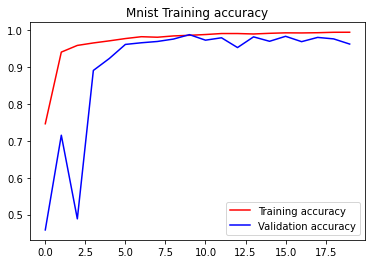

<Figure size 432x288 with 0 Axes>

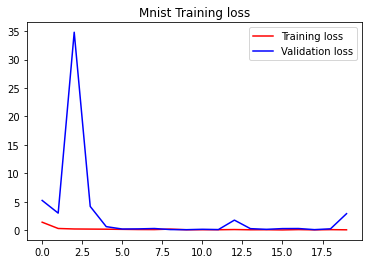

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Mnist Training accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Mnist Training loss")
plt.legend(loc=0)
plt.figure()
plt.show()

### 9.9 전이학습 - 이미 훈련된 모델을 고쳐 쓰기링

In [75]:
# LAB9.3에서 데이터를 읽는 것까지는
# 그대로 진행한 뒤에 전이학습 코드를 새로 작성한다.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers 
from keras.models import Model, load_model 
import pandas as pd
from tensorflow.keras.optimizers import RMSprop

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[:10000] / 255.0, x_test[:2000] / 255.0
y_train, y_test = y_train[:10000], y_test[:2000]

x_train_preprocess = np.zeros((x_train.shape[0], 75, 75, 3), 
                              dtype=np.float32)
print(x_train_preprocess.shape)

for i, img in enumerate(x_train):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_train_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

x_test_preprocess = np.zeros((x_test.shape[0], 75, 75, 3), 
                             dtype=np.float32)
print(x_test_preprocess.shape)
# 검증 데이터 각각의 크기를 75x75로 변형 (인셉션모델 최소 입력 크기)
for i, img in enumerate(x_test):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_test_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])



(10000, 75, 75, 3)
(2000, 75, 75, 3)


In [76]:
# 사전 훈련된 모델을 가져온다. - 이미지넷 데이터로 학습된 모델
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                              include_top=False,
                              weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [77]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [78]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(lr=0.0005),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_194 (Conv2D)            (None, 37, 37, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 37, 37, 32)  96          ['conv2d_194[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_188 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_188[0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                                                  
 conv2d_210 (Conv2D)            (None, 7, 7, 96)     55296       ['activation_203[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 7, 7, 48)    144         ['conv2d_207[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_204 (Batch  (None, 7, 7, 96)    288         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_201 (Activation)    (None, 7, 7, 48)     0           ['batch_normalization_201[0][0]']
          

In [79]:
history = model.fit(x_train_preprocess, y_train, epochs=20, 
                    validation_data=(x_test_preprocess, y_test))

Epoch 1/20
313/313 [==============================] - 15s 38ms/step - loss: 0.2844 - accuracy: 0.9165 - val_loss: 0.1789 - val_accuracy: 0.9515
Epoch 2/20
313/313 [==============================] - 11s 34ms/step - loss: 0.0803 - accuracy: 0.9745 - val_loss: 0.0879 - val_accuracy: 0.9720
Epoch 3/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0530 - accuracy: 0.9827 - val_loss: 0.1627 - val_accuracy: 0.9525
Epoch 4/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0391 - accuracy: 0.9864 - val_loss: 0.0720 - val_accuracy: 0.9735
Epoch 5/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0799 - val_accuracy: 0.9715
Epoch 6/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0745 - val_accuracy: 0.9765
Epoch 7/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0721 - val_accuracy:

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

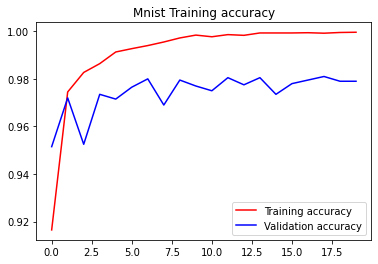

<Figure size 432x288 with 0 Axes>

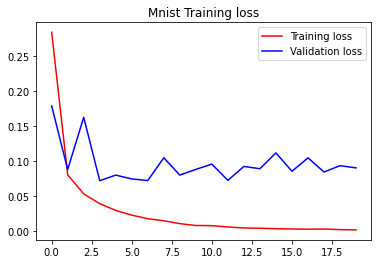

<Figure size 432x288 with 0 Axes>

In [81]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Mnist Training accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Mnist Training loss")
plt.legend(loc=0)
plt.figure()
plt.show()

### 9장 미니 프로젝트 B2  얼굴 찾기 : CNN 활용하기


In [82]:

import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다




In [83]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

<Figure size 432x288 with 0 Axes>

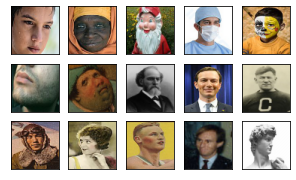

In [84]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

<Figure size 432x288 with 0 Axes>

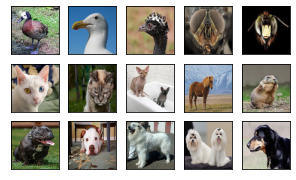

In [85]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [86]:
X =face_images + animal_images
y = [ [1,0] ]* len(face_images) + [ [0,1]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 64, 64, 3) (30, 2)


In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (64, 64, 3), 
                        kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax'),
])

In [88]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7556 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6908 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6817 - accuracy: 0.4333
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6776 - accuracy: 0.6333
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6556 - accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6399 - accuracy: 0.6333
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6359 - accuracy: 0.7333
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6130 - accuracy: 0.7000
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5906 - accuracy: 0.7667
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5740 - accuracy: 0.7333
Epoch 11/100
1/1 [===

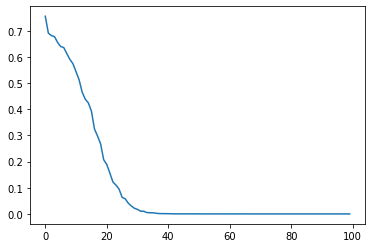

In [89]:
plt.plot(history.history['loss'])

<Figure size 432x288 with 0 Axes>

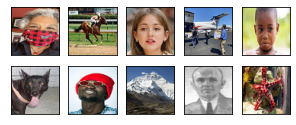

In [90]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

test_images = np.array(test_images)
plot_images(2, 5, test_images)

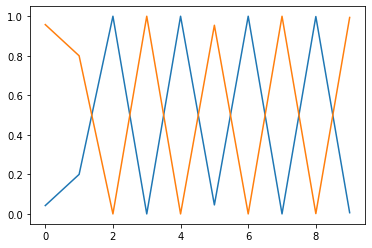

In [91]:
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

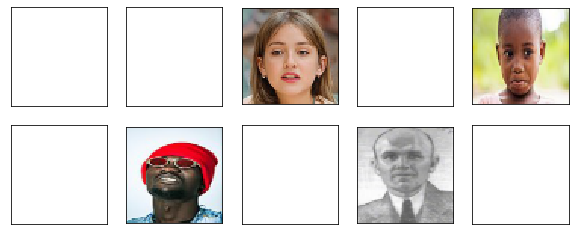

In [92]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j][0] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

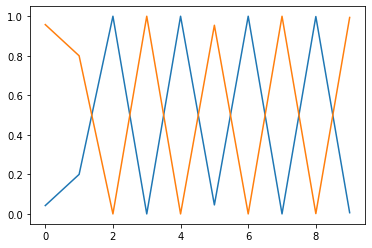

In [93]:
test_result = model.predict(test_images)
plt.plot(test_result)

### 9장 미니 프로젝트 B3  얼굴 찾기 : 전이학습 활용하기


In [94]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [95]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers
from keras.models import Model

In [96]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

<Figure size 432x288 with 0 Axes>

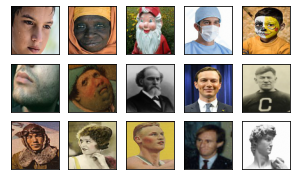

In [97]:
face_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    face_images.append(img)

def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

<Figure size 432x288 with 0 Axes>

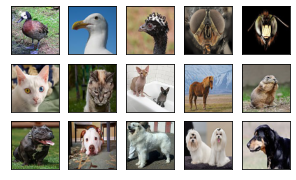

In [98]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [99]:
X = face_images + animal_images
# 얼굴 이미지는 1, 얼굴이 아닌 이미지는 0 - sparse_categorical_entropy 
y = [[1]]* len(face_images) + [[0]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 75, 75, 3) (30, 1)


In [100]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                                include_top=False,
                                weights=None)

In [101]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_292 (Conv2D)            (None, 37, 37, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 37, 37, 32)  96          ['conv2d_292[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_282 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_

In [102]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

In [103]:
model = Model(pre_trained_model.input, my_layer)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [104]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_292 (Conv2D)            (None, 37, 37, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 37, 37, 32)  96          ['conv2d_292[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_282 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_282[0

In [105]:
history = model.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 10s 10s/step - loss: 0.2947 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 100ms/step - loss: 0.4980 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 96ms/step - loss: 0.4996 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 93ms/step - loss: 0.4998 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 94ms/step - loss: 0.4998 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 96ms/step - loss: 0.4998 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 98ms/step - loss: 0.4995 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 96ms/step - loss: 0.4973 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 93ms/step - loss: 0.4212 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 95ms/step - loss: 0.3204 - accuracy: 0.6000
Epoch 11/100
1/1 [

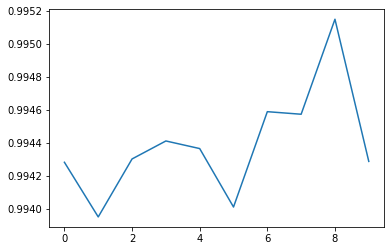

<Figure size 432x288 with 0 Axes>

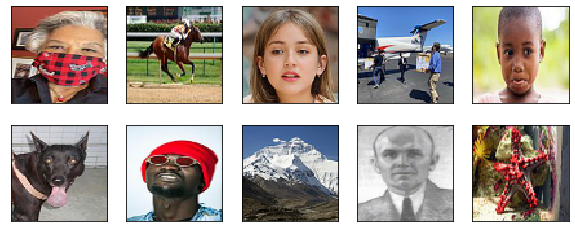

In [106]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []
for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    test_images.append(img)

test_images = np.array(test_images)
test_result = model.predict(test_images)
plt.plot(test_result)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [107]:
frozen = InceptionV3(input_shape=(75, 75, 3),
                     include_top=False,
                     weights='imagenet')
last_layer = frozen.get_layer('mixed7')
last_output = last_layer.output

for layer in frozen.layers:
    layer.trainable = False

In [108]:
my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(frozen.input, my_layer)
transfer_learner.summary()
transfer_learner.compile(optimizer='adam',
            loss='mse',
            metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_386 (Conv2D)            (None, 37, 37, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_376 (Batch  (None, 37, 37, 32)  96          ['conv2d_386[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_376 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_376[0

In [109]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2602 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 2.0516e-04 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 3.9926e-04 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 3.4904e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 1.0346e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 2.5418e-05 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 44ms/step - loss: 7.0810e-06 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 2.1347e-06 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 42ms/step - loss: 7.2193e-07 - accura

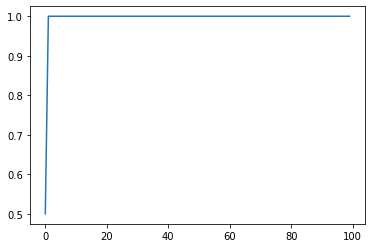

In [110]:
plt.plot(history.history['accuracy'])

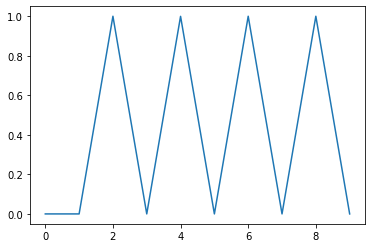

In [111]:
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

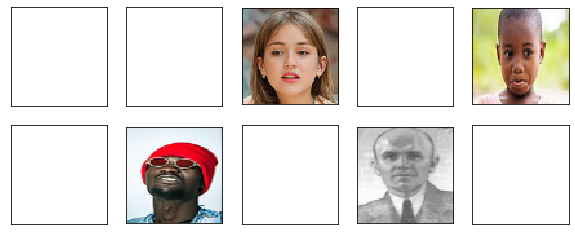

In [112]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [119]:
from keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, 
              input_shape=(75, 75, 3))

In [120]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

In [121]:
last_layer = vgg16.get_layer('block4_pool')
last_output = last_layer.output

for layer in vgg16.layers:
   layer.trainable = False

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(vgg16.input, my_layer)

transfer_learner.compile(optimizer='adam',
                         loss='mse',
                         metrics=['accuracy'])

In [122]:
transfer_learner.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0   

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.2336 - accuracy: 0.6333
Epoch 2/100
1/1 [==============================] - 0s 52ms/step - loss: 0.1602 - accuracy: 0.7667
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.3172 - accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0593 - accuracy: 0.9000
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 1.0678e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 55ms/step - loss: 1.9564e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 52ms/step - loss: 8.7881e-04 - accuracy: 1.0000
Epoch 11/

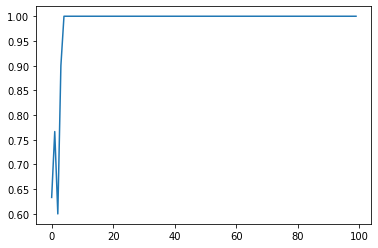

In [123]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)
plt.plot(history.history['accuracy'])

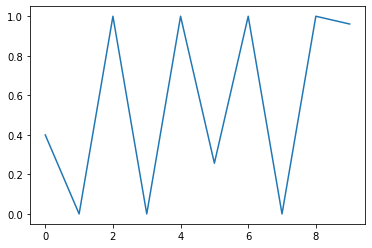

In [124]:
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

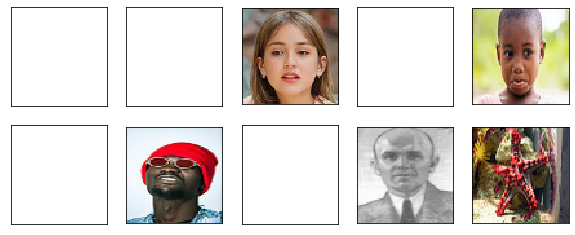

In [125]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')